In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Connect in googledrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/Social_Media_Impact_OnStudents.csv')

In [4]:
df.head()

,AgeGroup,Gender,SocialMediaHours,UsageDuringStudy,FocusReduction,Procrastination,CheckingDuringStudy,CourseworkDistraction,TimeManagementDifficulty,NotificationDisruption,Multitasking,TimeLost,StudyDelay,UsageLimitation,AcademicImpact,ProductivityWithoutSM,MostUsedPlatform,BreakFrequency,ProductivityImpact
0,25–34,Female,Less than 1 hour,Rarely,Slightly,Sometimes,Sometimes,Moderately,Moderately,Sometimes,Often,Sometimes,Often,Sometimes,Often,Slightly,Instagram,Often,Slightly
1,18–24,Female,1–3 hours,Sometimes,Moderately,Sometimes,Often,Moderately,Moderately,Sometimes,Often,Often,Sometimes,Often,Often,Moderately,Facebook,Sometimes,Moderately
2,18–24,Male,Less than 1 hour,Always,Significantly,Always,Often,Significantly,Moderately,Often,Always,Always,Often,Often,Always,Slightly,Facebook,Always,Significantly
3,18–24,Female,1–3 hours,Sometimes,Slightly,Sometimes,Often,Slightly,Slightly,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Slightly,TikTok,Sometimes,Slightly
4,18–24,Female,More than 3 hours,Often,Moderately,Often,Often,Significantly,Moderately,Sometimes,Often,Often,Always,Often,Often,Significantly,YouTube,Sometimes,Moderately


In [5]:
df.shape

(1501, 19)

In [6]:
df.isnull().sum()

,0
AgeGroup,0
Gender,0
SocialMediaHours,0
UsageDuringStudy,0
FocusReduction,0
Procrastination,0
CheckingDuringStudy,0
CourseworkDistraction,0
TimeManagementDifficulty,0
NotificationDisruption,0


<Axes: >

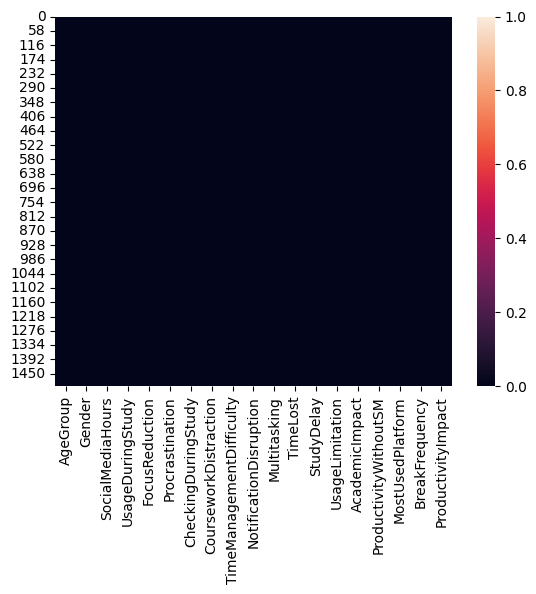

In [7]:
sns.heatmap(df.isnull())

In [8]:

import math
modeTestScore1=(df['UsageLimitation'].mode()[0])



df['UsageLimitation']=df['UsageLimitation'].fillna(modeTestScore1)

In [9]:
df.isnull().sum()

,0
AgeGroup,0
Gender,0
SocialMediaHours,0
UsageDuringStudy,0
FocusReduction,0
Procrastination,0
CheckingDuringStudy,0
CourseworkDistraction,0
TimeManagementDifficulty,0
NotificationDisruption,0


<Axes: >

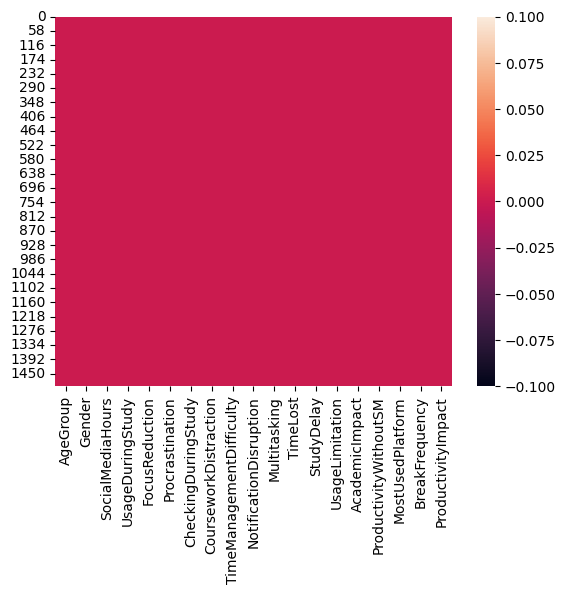

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AgeGroup                  1501 non-null   object
 1   Gender                    1501 non-null   object
 2   SocialMediaHours          1501 non-null   object
 3   UsageDuringStudy          1501 non-null   object
 4   FocusReduction            1501 non-null   object
 5   Procrastination           1501 non-null   object
 6   CheckingDuringStudy       1501 non-null   object
 7   CourseworkDistraction     1501 non-null   object
 8   TimeManagementDifficulty  1501 non-null   object
 9   NotificationDisruption    1501 non-null   object
 10  Multitasking              1501 non-null   object
 11  TimeLost                  1501 non-null   object
 12  StudyDelay                1501 non-null   object
 13  UsageLimitation           1501 non-null   object
 14  AcademicImpact          

In [13]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = [
    'AgeGroup', 'Gender', 'SocialMediaHours', 'UsageDuringStudy',
    'FocusReduction', 'Procrastination', 'CheckingDuringStudy',
    'CourseworkDistraction', 'TimeManagementDifficulty', 'NotificationDisruption',
    'Multitasking', 'TimeLost', 'StudyDelay',
    'UsageLimitation', 'AcademicImpact', 'ProductivityWithoutSM',
    'MostUsedPlatform', 'BreakFrequency', 'ProductivityImpact'
]

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,AgeGroup,Gender,SocialMediaHours,UsageDuringStudy,FocusReduction,Procrastination,CheckingDuringStudy,CourseworkDistraction,TimeManagementDifficulty,NotificationDisruption,Multitasking,TimeLost,StudyDelay,UsageLimitation,AcademicImpact,ProductivityWithoutSM,MostUsedPlatform,BreakFrequency,ProductivityImpact
0,1,0,1,2,3,3,3,0,0,3,1,3,1,4,1,3,1,1,3
1,0,0,0,3,0,3,1,0,0,3,1,1,3,1,1,0,0,3,0
2,0,1,1,0,2,0,1,2,0,1,0,0,1,1,0,3,0,0,2
3,0,0,0,3,3,3,1,3,3,3,3,3,3,4,3,3,5,3,3
4,0,0,2,1,0,1,1,2,0,3,1,1,0,1,1,2,7,3,0


# **DATA ANALYSIS**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   AgeGroup                  1501 non-null   int64
 1   Gender                    1501 non-null   int64
 2   SocialMediaHours          1501 non-null   int64
 3   UsageDuringStudy          1501 non-null   int64
 4   FocusReduction            1501 non-null   int64
 5   Procrastination           1501 non-null   int64
 6   CheckingDuringStudy       1501 non-null   int64
 7   CourseworkDistraction     1501 non-null   int64
 8   TimeManagementDifficulty  1501 non-null   int64
 9   NotificationDisruption    1501 non-null   int64
 10  Multitasking              1501 non-null   int64
 11  TimeLost                  1501 non-null   int64
 12  StudyDelay                1501 non-null   int64
 13  UsageLimitation           1501 non-null   int64
 14  AcademicImpact            1501 non-null 

In [15]:
df.describe()

,AgeGroup,Gender,SocialMediaHours,UsageDuringStudy,FocusReduction,Procrastination,CheckingDuringStudy,CourseworkDistraction,TimeManagementDifficulty,NotificationDisruption,Multitasking,TimeLost,StudyDelay,UsageLimitation,AcademicImpact,ProductivityWithoutSM,MostUsedPlatform,BreakFrequency,ProductivityImpact
count,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,0.522318,0.611592,1.189873,1.632911,1.582945,1.640240,1.677548,1.591606,1.575616,1.589607,1.692205,1.600266,1.552298,1.888741,1.697535,1.554963,2.184544,1.639574,1.592272
std,0.739596,0.544401,0.908070,1.147965,1.208559,1.143599,1.153526,1.258214,1.227645,1.134078,1.135429,1.151278,1.165374,1.591314,1.115551,1.169819,2.724932,1.148915,1.225961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,5.000000,3.000000,3.000000
max,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,7.000000,3.000000,3.000000


# Box Plot of DataFrame

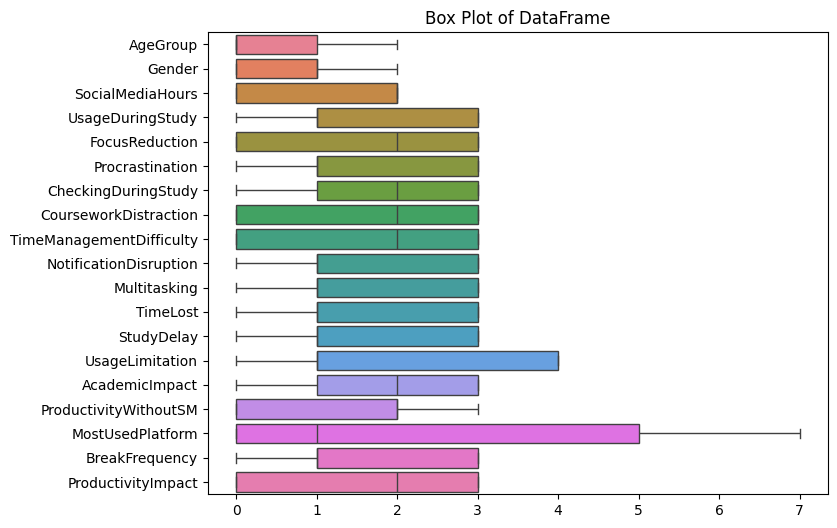

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of DataFrame")
plt.show()

In [22]:
df.corr()

,AgeGroup,Gender,SocialMediaHours,UsageDuringStudy,FocusReduction,Procrastination,CheckingDuringStudy,CourseworkDistraction,TimeManagementDifficulty,NotificationDisruption,Multitasking,TimeLost,StudyDelay,UsageLimitation,AcademicImpact,ProductivityWithoutSM,MostUsedPlatform,BreakFrequency,ProductivityImpact
AgeGroup,1.000000,-0.037235,0.000138,-0.008796,-0.022397,-0.007053,-0.050166,-0.029959,0.026959,-0.045505,-0.087874,-0.132795,-0.075029,-0.032725,-0.057263,0.091624,0.139039,-0.096835,0.102685
Gender,-0.037235,1.000000,0.166812,-0.029882,-0.082219,-0.069325,-0.037145,-0.185014,0.048463,-0.215162,-0.134216,-0.083014,-0.098787,-0.060689,-0.033302,-0.070615,-0.137252,-0.092867,-0.017686
SocialMediaHours,0.000138,0.166812,1.000000,-0.274601,-0.096064,-0.285978,-0.261008,-0.228500,-0.173457,-0.293279,-0.273041,-0.251298,-0.275555,-0.112705,-0.256531,-0.133778,-0.108199,-0.196990,-0.068147
UsageDuringStudy,-0.008796,-0.029882,-0.274601,1.000000,0.182695,0.503130,0.533818,0.206766,0.225250,0.373241,0.488150,0.477062,0.517422,0.297682,0.402589,0.192510,-0.032888,0.327241,0.175431
FocusReduction,-0.022397,-0.082219,-0.096064,0.182695,1.000000,0.112770,0.193264,0.217606,0.280984,0.170287,0.166794,0.181961,0.233234,0.181071,0.056201,0.207671,-0.019732,0.121650,0.214069
Procrastination,-0.007053,-0.069325,-0.285978,0.503130,0.112770,1.000000,0.577067,0.302764,0.248745,0.538393,0.537446,0.630484,0.618405,0.316118,0.539120,0.191199,-0.037513,0.442637,0.232917
CheckingDuringStudy,-0.050166,-0.037145,-0.261008,0.533818,0.193264,0.577067,1.000000,0.204558,0.198947,0.523559,0.619472,0.608184,0.573940,0.368685,0.540148,0.146040,-0.034716,0.424332,0.170021
CourseworkDistraction,-0.029959,-0.185014,-0.228500,0.206766,0.217606,0.302764,0.204558,1.000000,0.390103,0.256698,0.211077,0.273820,0.255320,0.191388,0.226840,0.244672,-0.011448,0.161900,0.303426
TimeManagementDifficulty,0.026959,0.048463,-0.173457,0.225250,0.280984,0.248745,0.198947,0.390103,1.000000,0.167394,0.220453,0.188850,0.181647,0.171354,0.180275,0.215168,0.059299,0.188311,0.258365
NotificationDisruption,-0.045505,-0.215162,-0.293279,0.373241,0.170287,0.538393,0.523559,0.256698,0.167394,1.000000,0.613720,0.561546,0.593823,0.403569,0.503078,0.166763,-0.019269,0.507551,0.251661


# Correlation Matrix Heatmap

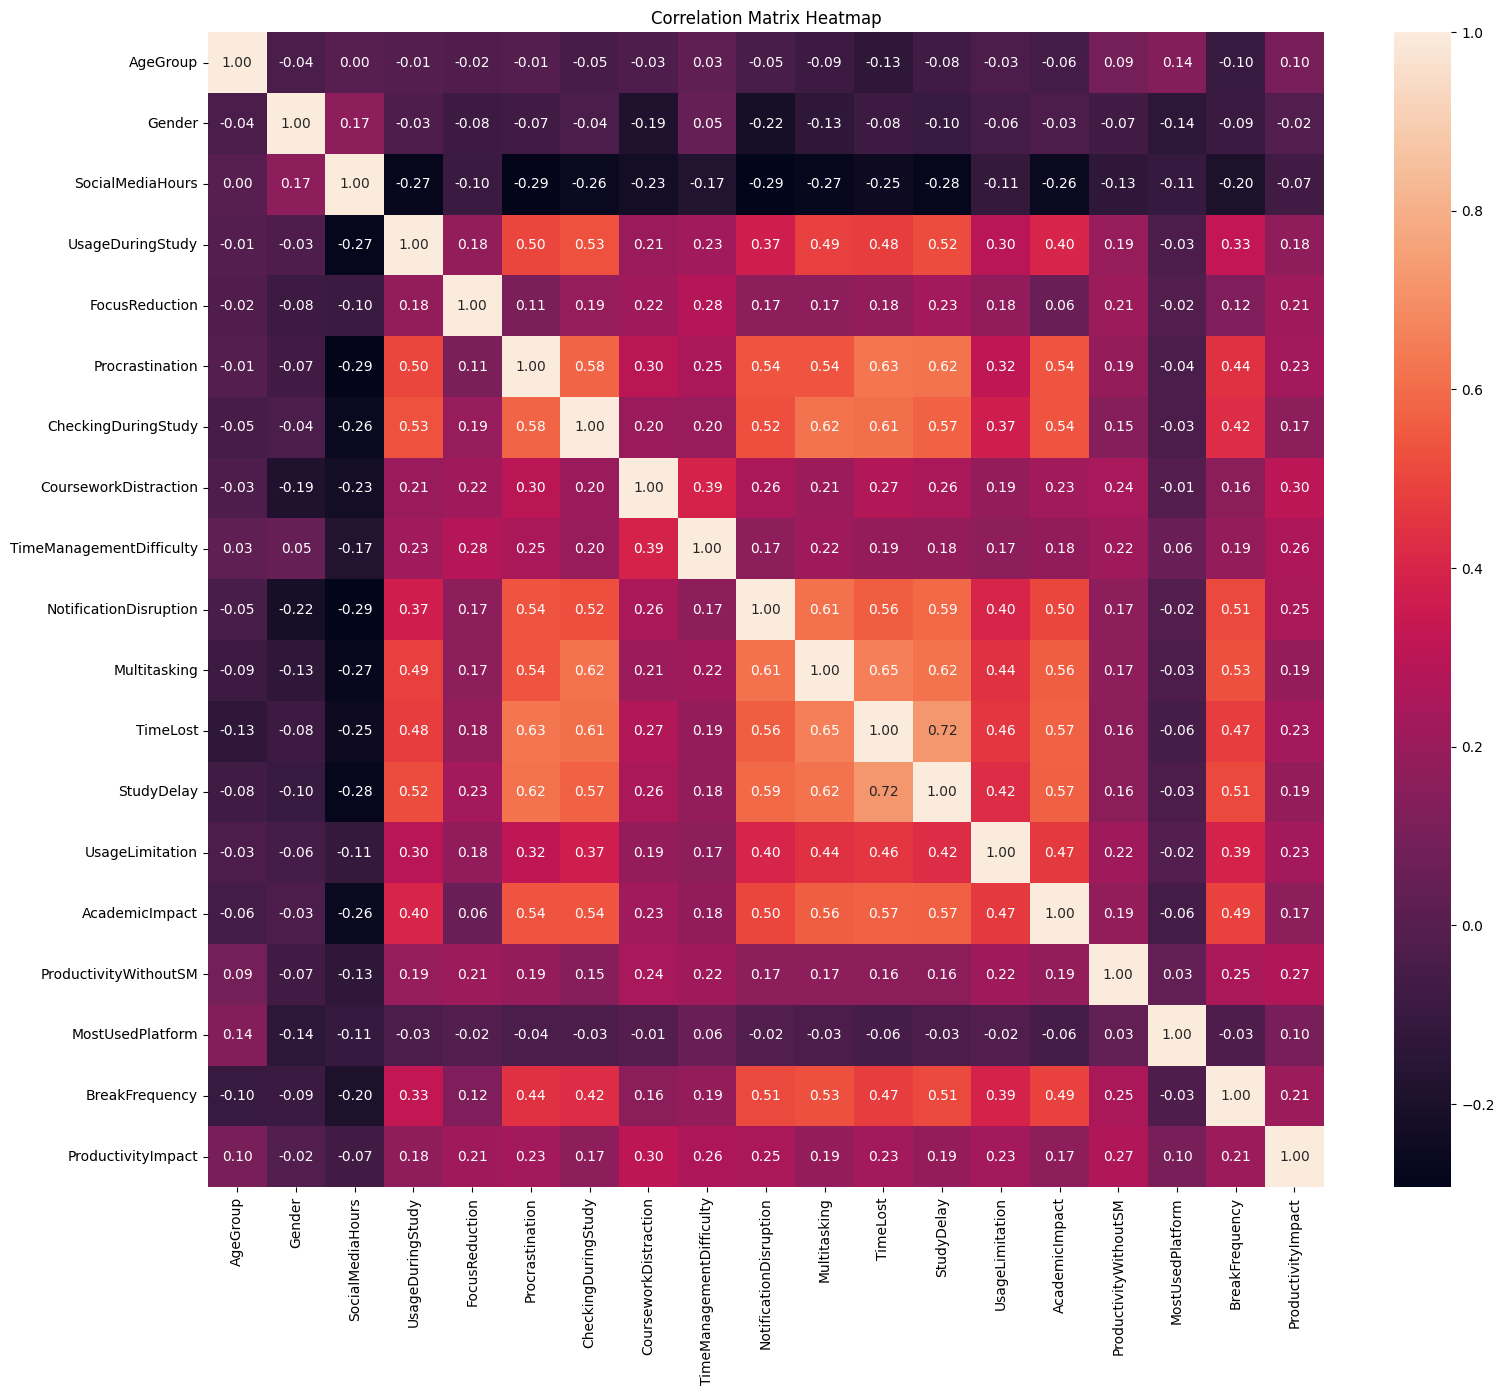

In [24]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True,fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


# **DATA SPLITING**

In [44]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

X_numeric = df[numeric_columns].drop(columns=['ProductivityImpact'])
y = df['ProductivityImpact']

selector = SelectKBest(score_func=chi2, k=9)

X_numeric_new = selector.fit_transform(X_numeric, y)

selected_indices = selector.get_support(indices=True)

selected_features = X_numeric.columns[selected_indices]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Procrastination', 'CheckingDuringStudy', 'NotificationDisruption',
       'Multitasking', 'TimeLost', 'StudyDelay', 'UsageLimitation',
       'AcademicImpact', 'BreakFrequency'],
      dtype='object')


In [45]:
X_numeric = df[list(selected_features)]
y = df['ProductivityImpact']

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X_numeric_new, y, test_size=0.2, random_state=42)

print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)


Training data shape (X_train, y_train): (1200, 9) (1200,)
Testing data shape (X_test, y_test): (301, 9) (301,)


# **NAIVE_BAYES** **MODEL**

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5282392026578073


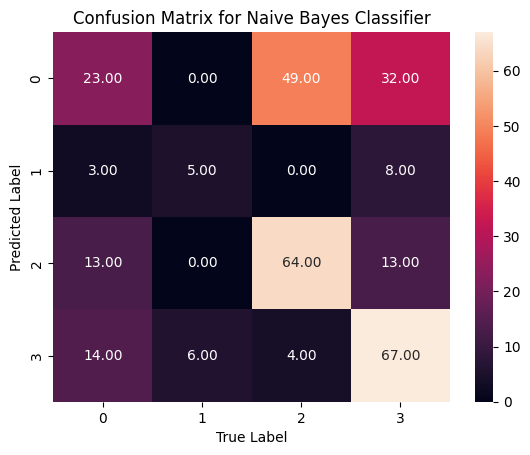

In [48]:
from sklearn.metrics import confusion_matrix
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.22      0.29       104
           1       0.45      0.31      0.37        16
           2       0.55      0.71      0.62        90
           3       0.56      0.74      0.64        91

    accuracy                           0.53       301
   macro avg       0.50      0.50      0.48       301
weighted avg       0.51      0.53      0.50       301



# **DECESSION** **TREE**

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9401993355481728
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       104
           1       0.93      0.88      0.90        16
           2       0.96      0.97      0.96        90
           3       0.92      0.96      0.94        91

    accuracy                           0.94       301
   macro avg       0.94      0.93      0.93       301
weighted avg       0.94      0.94      0.94       301



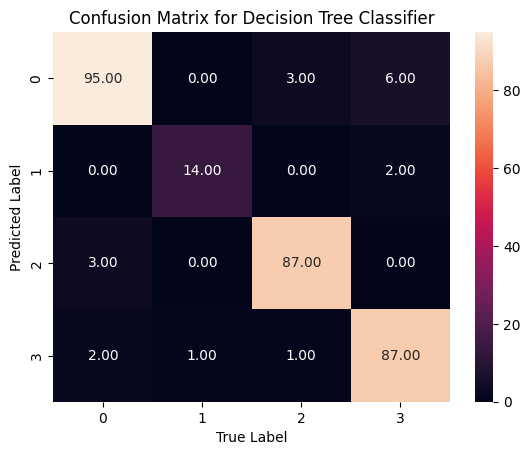

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# **KNN**

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7906976744186046


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       104
           1       0.67      0.50      0.57        16
           2       0.78      0.84      0.81        90
           3       0.83      0.81      0.82        91

    accuracy                           0.79       301
   macro avg       0.76      0.73      0.74       301
weighted avg       0.79      0.79      0.79       301



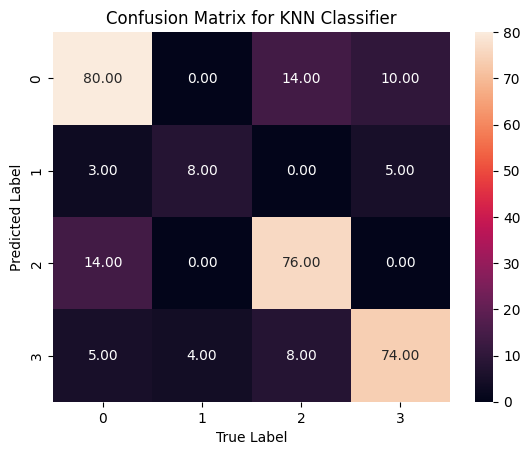

In [54]:
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

# **LOGISTIC REGRESSION**

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5780730897009967


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.37      0.45       104
           1       0.00      0.00      0.00        16
           2       0.58      0.70      0.64        90
           3       0.57      0.80      0.67        91

    accuracy                           0.58       301
   macro avg       0.43      0.47      0.44       301
weighted avg       0.55      0.58      0.55       301



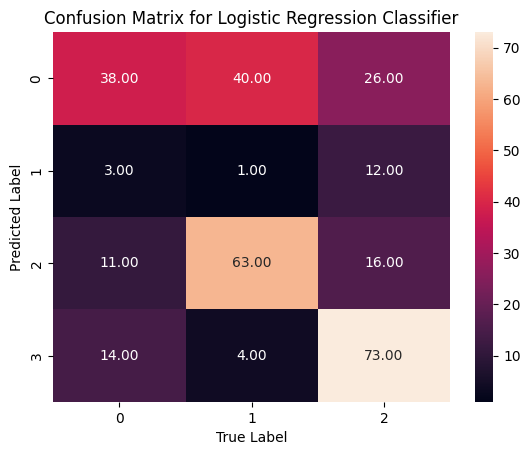

In [57]:
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

# **LINEAR REGRESSION**

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

MAE: 1.0755763839369954
MSE: 1.3807611584956243
R^2: 0.10473942117979829


In [59]:
!pip install streamlit pyngrok scikit-learn joblib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.2 MB/s eta 0:00:00
